<a href="https://colab.research.google.com/github/C22342081/Applied-Predictive-Analytics-Lab/blob/main/Important_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Data Preparation**

### Step 1: Load & Inspect Data

In [ ]:
import pandas as pd

df = pd.read_csv('your_dataset.csv')
df.info()      # structure and missing values
df.describe()  # summary stats
df.head()      # preview


### Step 2: Handle Missing & Categorical Data

In [ ]:
df.dropna(inplace=True)                        # or fillna()

# Encode categorical columns, only if there are text columns
df['Category'] = pd.factorize(df['Category'])[0]  # for object/text features


### Step 3: Define Features and Target

In [ ]:
# Separate what you want to predict (target) from
# the data you use to make that prediction (features).
X = df.drop('target_column', axis=1)
y = df['target_column']


### **2. Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **3. Text Data Only (Optional)**

In [ ]:
# If your data contains text (e.g., tweets, reviews), convert it to numbers.
# L models can't process raw text — we turn text into vectors.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
X_train = vectorizer.fit_transform(X_train)  # Learn vocab and transform
X_test = vectorizer.transform(X_test)        # Use same vocab on test data


### **4. Model Training (Classifier or Regressor)**

### A. Support Vector Machine (SVM)

In [ ]:
#Binary classification problems (e.g., positive/negative).
# Kernel: Use "linear" for speed and interpretability.

from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)  # C controls margin flexibility
model.fit(X_train, y_train)


### B. Decision Tree



*   **gini**
You want faster performance (default in sklearn)
*   **entropy**
You care about information gain and more refined splits


In [ ]:
#Interpretable models with both classification and regression tasks.
#Criterion: "gini" or "entropy" for classification; use Regressor for numbers.
from sklearn.tree import DecisionTreeClassifier  # or DecisionTreeRegressor

model = DecisionTreeClassifier(max_depth=4, criterion='entropy')  # or gini
model.fit(X_train, y_train)


In [ ]:
#Example
from sklearn.tree import DecisionTreeClassifier
# max_depth are the max split in the tree
# Using Gini (default)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

# Using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4)


### C. Random Forest

In [ ]:
#Robust models that generalize well (uses multiple decision trees).
from sklearn.ensemble import RandomForestClassifier  # or Regressor

model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)


### D. Gradient Boosting

In [ ]:
#Very accurate models, especially for regression or imbalanced data.
from sklearn.ensemble import GradientBoostingRegressor

#A lower learning rate (e.g. 0.01) needs more trees to reach good performance.
#A higher learning rate (e.g. 0.5) learns faster, but may overfit.
# n_estimator = Number of trees

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


### **5. Model Evaluation**

### Classification

In [ ]:
# accuracy_score → how many predictions were correct
# confusion_matrix → counts of true/false positives/negatives
# classification_report → includes precision, recall, F1-score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


### Regression

In [ ]:
# MSE = average squared error
# RMSE = square root of MSE (easier to interpret)

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


### **6. Hyperparameter Tuning**

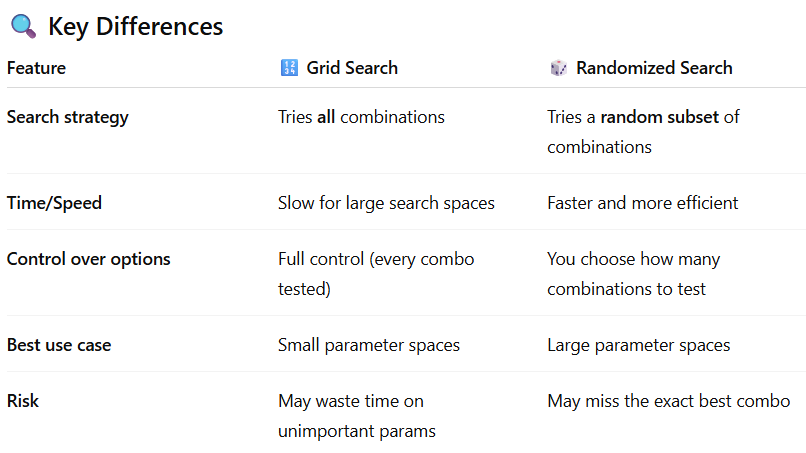

### Randomized Search

automatically searches for the best combination of hyperparameters for a RandomForestClassifier using randomized search and cross-validation.

In [ ]:
# Try random combinations of parameters.

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier  # or Regressor

param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier()
search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3)
search.fit(X_train, y_train)

best_model = search.best_estimator_


### Grid Search

In [ ]:
# Try every combination in a grid

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
search.fit(X_train, y_train)

best_model = search.best_estimator_


### **7. Cross-Validation**

In [ ]:
# Test your model using multiple train-test splits.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # or 'neg_mean_squared_error' for regression
print("Average CV Score:", scores.mean())
